In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator ,img_to_array, load_img
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import plot_model
from keras import Model

Using TensorFlow backend.


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/val'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person

In [3]:
test_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/test"
train_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/val"

train_dir_noraml = train_dir + '/NORMAL'
train_dir_pneumonia = train_dir + '/PNEUMONIA'

test_dir_noraml  = test_dir + '/NORMAL'
test_dir_pneumonia  = test_dir + '/PNEUMONIA'

val_dir_noraml  = val_dir + '/NORMAL'
val_dir_pneumonia  = val_dir + '/PNEUMONIA'

In [4]:
print('number of normal training images - ',len(os.listdir(train_dir_noraml)))
print('number of pneumonia training images - ',len(os.listdir(train_dir_pneumonia)))
print('----------------------------------------------------------------------')
print('number of normal testing  images - ',len(os.listdir(test_dir_noraml)))
print('number of pneumonia testing  images - ',len(os.listdir(test_dir_pneumonia)))
print('----------------------------------------------------------------------')
print('number of normal validation  images - ',len(os.listdir(val_dir_noraml)))
print('number of pneumonia validation  images - ',len(os.listdir(val_dir_pneumonia)))

number of normal training images -  1341
number of pneumonia training images -  3875
----------------------------------------------------------------------
number of normal testing  images -  234
number of pneumonia testing  images -  390
----------------------------------------------------------------------
number of normal validation  images -  8
number of pneumonia validation  images -  8


In [5]:
data_generator = ImageDataGenerator(rescale= 1./255 ,shear_range = 0.2,zoom_range = 0.2)

In [6]:
batch_size = 64
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (150, 150),
                                                   class_mode='binary',
                                                   batch_size = batch_size)

testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (150, 150),
                                                  class_mode='binary',
                                                  batch_size = batch_size)

test_generator = data_generator.flow_from_directory(directory = val_dir,
                                                  target_size = (150, 150),
                                                  class_mode='binary',
                                                  batch_size = 6)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [7]:
set(training_data.classes)

{0, 1}

In [8]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=2, patience=8)

In [9]:
input_model = Input(training_data.image_shape)


model1 = Conv2D(32,(7,7), activation='relu')(input_model)
model1 = Conv2D(32,(7,7), activation='relu', padding='same')(model1)
model1 = Conv2D(32,(6,6), activation='relu', padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = MaxPooling2D((2,2))(model1)
model1 = Conv2D(64,(6,6), activation='relu' ,padding='same')(model1)
model1 = Conv2D(64,(5,5), activation='relu' ,padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = AveragePooling2D((2, 2))(model1)
model1 = Conv2D(128,(5,5), activation='relu' ,padding='same')(model1)
model1 = Conv2D(128,(5,5), activation='relu' ,padding='same')(model1)
model1 = Conv2D(128,(5,5), activation='relu' ,padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = AveragePooling2D((2, 2))(model1)
model1 = Conv2D(512,(4,4), activation='relu' ,padding='same')(model1)
model1 = Conv2D(512,(4,4), activation='relu' ,padding='same')(model1)
model1 = Conv2D(512,(4,4), activation='relu' ,padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = MaxPooling2D((2, 2))(model1)
model1 = Conv2D(512,(3,3), activation='relu' ,padding='valid')(model1)
model1 = Conv2D(512,(3,3), activation='relu' ,padding='valid')(model1)
model1 = Conv2D(512,(3,3), activation='relu' ,padding='valid')(model1)
model1 = BatchNormalization()(model1)
model1 = AveragePooling2D((2, 2))(model1)
model1 = Flatten()(model1)
#########################################################                          
model2 = Conv2D(32,(4,4), activation='relu')(input_model)  
model2 = Conv2D(32,(4,4), activation='relu', padding='same')(model2)
model2 = Conv2D(32,(4,4), activation='relu', padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = MaxPooling2D((3, 3))(model2)
model2 = Conv2D(64,(3,3), activation='relu', padding='same')(model2) 
model2 = Conv2D(64,(3,3), activation='relu', padding='same')(model2)
model2 = Conv2D(64,(3,3), activation='relu', padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(128,(3,3), activation='relu', padding='same')(model2)
model2 = Conv2D(128,(3,3), activation='relu', padding='same')(model2) 
model2 = Conv2D(128,(2,2), activation='relu' ,padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(256,(2,2), activation='relu' ,padding='same')(model2)
model2 = Conv2D(256,(2,2), activation='relu' ,padding='same')(model2)
model2 = Conv2D(256,(2,2), activation='relu' ,padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(512,(1,1), activation='relu' ,padding='same')(model2)
model2 = Conv2D(512,(1,1), activation='relu' ,padding='valid')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(1024,(1,1), activation='relu' ,padding='valid')(model2)
model2 = Conv2D(1024,(1,1), activation='relu' ,padding='valid')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Flatten()(model2)
########################################################
merged = Concatenate()([model1, model2])
merged = Dense(units = 512, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dropout(rate = 0.2)(merged)
merged = Dense(units = 64, activation = 'relu')(merged)
merged = Dense(units = 32, activation = 'relu')(merged)
merged = Dense(units = 16, activation = 'relu')(merged)
merged = Dense(units = 8, activation = 'relu')(merged)
merged = Dense(units = 4, activation = 'relu')(merged)
merged = Dense(units = 2, activation = 'relu')(merged)
output = Dense(activation = 'sigmoid', units = 1)(merged)
#output = Dense(units = len(set(training_data.classes)), activation = 'softmax')(merged)

model = Model(inputs= [input_model], outputs=[output])

In [10]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 147, 147, 32) 1568        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 147, 147, 32) 16416       conv2d_15[0][0]                  
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 147, 147, 32) 16416       conv2d_16[0][0]                  
____________________________________________________________________________________________

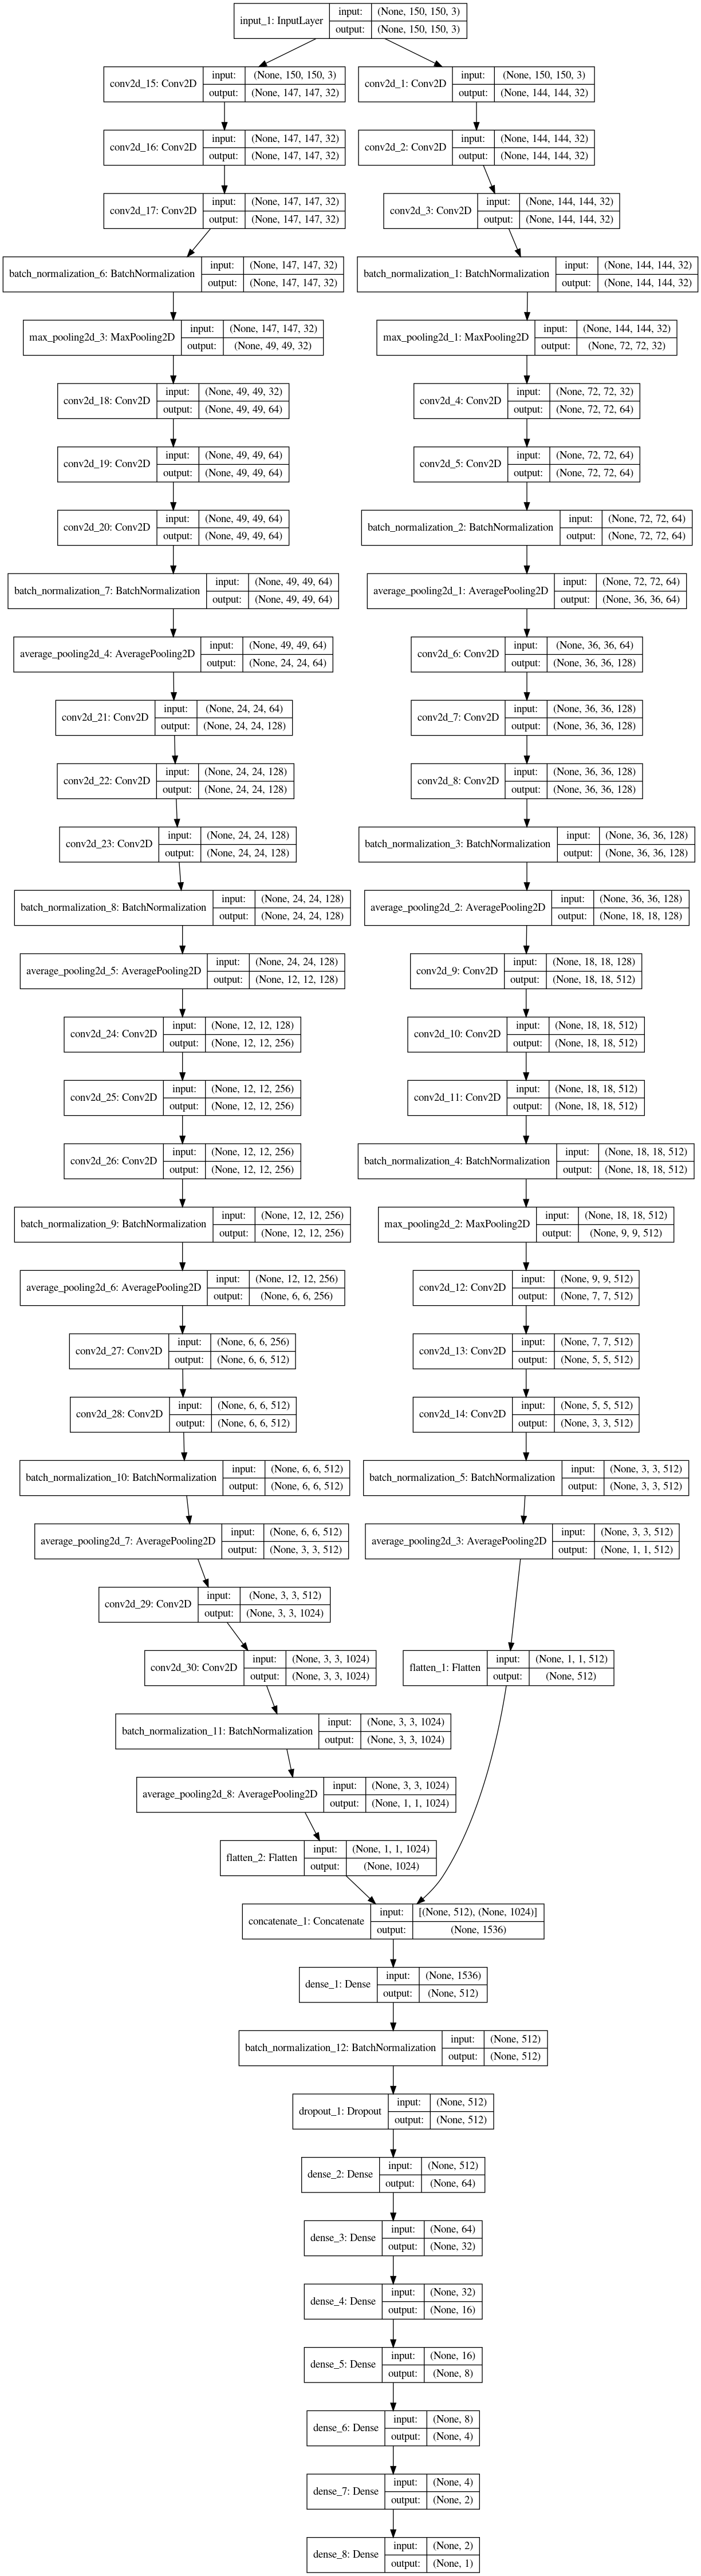

In [12]:
plot_model(model, show_shapes=True)

In [13]:
history =  model.fit_generator(training_data,epochs = 30,
                               steps_per_epoch = len(training_data),
                               validation_data = testing_data ,
                               validation_steps = len(testing_data),
                               callbacks=[es],
                               verbose=1)

Epoch 1/30
82/82 [==============================] - 213s 3s/step - loss: 0.3541 - accuracy: 0.8441 - val_loss: 8.9955 - val_accuracy: 0.6234
Epoch 2/30
82/82 [==============================] - 186s 2s/step - loss: 0.2699 - accuracy: 0.9039 - val_loss: 0.6057 - val_accuracy: 0.6202
Epoch 3/30
82/82 [==============================] - 180s 2s/step - loss: 0.2383 - accuracy: 0.9141 - val_loss: 0.6191 - val_accuracy: 0.6587
Epoch 4/30
82/82 [==============================] - 178s 2s/step - loss: 0.2120 - accuracy: 0.9283 - val_loss: 0.6515 - val_accuracy: 0.6378
Epoch 5/30
82/82 [==============================] - 172s 2s/step - loss: 0.1790 - accuracy: 0.9387 - val_loss: 0.5026 - val_accuracy: 0.7997
Epoch 6/30
82/82 [==============================] - 168s 2s/step - loss: 0.1723 - accuracy: 0.9402 - val_loss: 0.8581 - val_accuracy: 0.7564
Epoch 7/30
82/82 [==============================] - 168s 2s/step - loss: 0.1782 - accuracy: 0.9346 - val_loss: 2.0937 - val_accuracy: 0.6250
Epoch 8/30
82

In [14]:
model.save_weights("weights.h5")

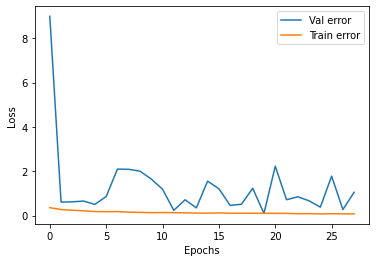

In [15]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

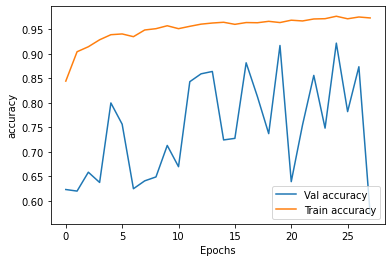

In [16]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig( 'plot_accuracy.png')
plt.show()

In [17]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 50.00%


In [18]:
test_generator = data_generator.flow_from_directory(directory = val_dir,
                                                  target_size = (150, 150),
                                                  class_mode= None,
                                                  batch_size = 8)

Found 16 images belonging to 2 classes.


In [19]:
pred = model.predict_generator(test_generator)
pred = pred.reshape(1,16)
predicted_class_indices= np.round_(pred)
labels = (test_generator.class_indices)
print(predicted_class_indices)
print (labels)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
{'NORMAL': 0, 'PNEUMONIA': 1}


In [20]:
pred

array([[0.03906639, 0.05921464, 0.05755877, 0.04013726, 0.04058574,
        0.11335364, 0.08564757, 0.03906639, 0.04078805, 0.10753492,
        0.03906639, 0.04350451, 0.03906639, 0.03906639, 0.0499212 ,
        0.0402481 ]], dtype=float32)